# Loan Delinquency Prediction Final Submission

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# importing required libraries

# Loading the Data

In [29]:
data = pd.read_csv("train1.csv")

In [30]:
data.head(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,...,0,0,0,0,0,0,0,0,0,1
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,...,0,0,0,0,0,0,0,0,0,1
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,...,0,0,0,0,0,0,0,0,0,1
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,...,0,1,0,1,0,1,2,0,1,1
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,...,0,0,1,1,1,1,1,2,2,1


In [31]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [32]:
data.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [33]:
data['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [34]:
y = data['m13']

In [245]:
col = ["m13"]
x = data.drop(col,axis=1)

# One Hot Encoding

In [246]:
#category encoders takes our data and one hot encode all the categorical features
import category_encoders as ce
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
x_ohe = ohe.fit_transform(x)
x_ohe.head()

,source_Z,source_Y,source_X,"financial_institution_Turner, Baldwin and Rhodes","financial_institution_Swanson, Newton and Miller",financial_institution_Thornton-Davis,financial_institution_OTHER,financial_institution_Browning-Hart,financial_institution_Richardson Ltd,financial_institution_Edwards-Hoffman,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,1
4,0,0,1,0,0,0,1,0,0,0,...,2,3,4,5,6,7,8,9,10,11


In [247]:
x_ohe.columns

Index(['source_Z', 'source_Y', 'source_X',
       'financial_institution_Turner, Baldwin and Rhodes',
       'financial_institution_Swanson, Newton and Miller',
       'financial_institution_Thornton-Davis', 'financial_institution_OTHER',
       'financial_institution_Browning-Hart',
       'financial_institution_Richardson Ltd',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Richards-Walters',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Anderson-Taylor',
       'financial_institution_Taylor, Hunt and Rodriguez',
       'financial_institution_Nicholson Group',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Sanchez, Hays and Wilkerson',
       'financial_institution_Sanchez-Robinson',
       'financial_institution_Suarez Inc',
       'financial_institution_Romero, Woods and Johnson',
       'financial_institution_Chap

# Simultaneous SMOTE upsampling and Tomek Link downsampling

In [249]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
x_ohe1, y1 = smt.fit_sample(x_ohe, y)


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ohe1, y1, test_size=0.1)

In [250]:
y_train.shape

(153166,)

In [251]:
x_train.shape

(153166, 55)

In [69]:
feature_names = list(data.columns)

# Random Forest Classifier

In [235]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(random_state = 0,class_weight='balanced', verbose = 1)
clf1.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.5s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=0, verbose=1, warm_start=False)

# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [300,600],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [6,7,8,9,10],
    'criterion' : ['gini','entropy']
}
cv_rfc = GridSearchCV(estimator=clf1,param_grid=param_grid,cv=10,n_jobs=-1,verbose=1)
cv_rfc.fit(x_rfe,y_train)
print (cv_rfc.best_params_)

In [252]:
rfc = RandomForestClassifier(n_estimators=500,criterion='entropy',max_features='auto',max_depth=8,class_weight='balanced')
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

# Ensemble Vote Classifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

ada_boost = AdaBoostClassifier(n_estimators=5)
grad_boost = GradientBoostingClassifier(n_estimators=10)
xgb_boost = XGBClassifier(max_depth=5, learning_rate=0.001)

ensemble_clf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
boosting_labels = ['Ada Boost', 'Gradient Boost', 'XG Boost', 'Ensemble']

for clf, label in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels):
    scores = cross_val_score(clf, x_train, y_train, cv=3, scoring='f1')
    print("f1-score: {0:.3f}, Variance: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

f1-score: 0.924, Variance: (+/-) 0.002 [Ada Boost]
f1-score: 0.901, Variance: (+/-) 0.002 [Gradient Boost]
f1-score: 0.945, Variance: (+/-) 0.000 [XG Boost]
f1-score: 0.932, Variance: (+/-) 0.002 [Ensemble]


In [74]:
ensemble_clf.fit(x_train,y_train)

EnsembleVoteClassifier(clfs=[AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=5,
                                                random_state=None),
                             GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_im

In [87]:
xgb_boost.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [98]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

# Randomized Search CV on Xg Boost

In [101]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb_boost, param_distributions=params, n_iter=param_comb, scoring='f1', n_jobs=-1, cv=skf.split(x_train,y_train), verbose=3, random_state=1001 )

random_search.fit(x_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  9.5min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x111d39570>,
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.001,
                                           max_delta_step=0, max_depth=5,
                                           min_child_weight=1, missing=None,
                                           n_estimators=100, n_jobs=1,
                                           nthread=None,
                                           objecti...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           v

In [102]:
print(random_search.best_params_)

{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.6}


In [105]:
xgb_boost1 = XGBClassifier(max_depth=5,min_child_weight=5,subsample=1,gamma=5,colsample_bytree=0.6, learning_rate=0.001)
xgb_boost1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# GridSearch CV on GradBoost Classifier

In [114]:
param_test1 = {'n_estimators':range(20,81,10)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1',n_jobs=-1,iid=False, cv=5)
gsearch1.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [115]:
print(gsearch1.best_params_)

{'n_estimators': 80}


In [ ]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='f1',n_jobs=-1,iid=False, cv=5)
gsearch2.fit(x_train,y_train)
print(gsearch2.best_params_)

In [117]:
print(gsearch2.best_params_)

{'max_depth': 15, 'min_samples_split': 200}


In [119]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=15,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='f1',n_jobs=-1,iid=False, cv=5)
gsearch3.fit(x_train,y_train)
print(gsearch3.best_params_)

{'min_samples_leaf': 50, 'min_samples_split': 1000}


In [120]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=15, min_samples_split=1000, min_samples_leaf=50, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='f1',n_jobs=-1,iid=False, cv=5)
gsearch4.fit(x_train,y_train)
print(gsearch4.best_params_)

{'max_features': 7}


In [122]:
grad_boost1 = GradientBoostingClassifier(n_estimators=160,max_depth=15,min_samples_split=1000,min_samples_leaf=50,learning_rate=0.05,subsample=0.85,random_state=10)
grad_boost1.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=15,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=160,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [124]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('xg', xgb_boost1), ('randfor', rfc),('gradboost',grad_boost1)], voting='hard')
model.fit(x_train,y_train)

VotingClassifier(estimators=[('xg',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.6, gamma=5,
                                            learning_rate=0.001,
                                            max_delta_step=0, max_depth=5,
                                            min_child_weight=5, missing=None,
                                            n_estimators=100, n_jobs=1,
                                            nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_wei...
                                                         max_leaf_nodes=None,
                                   

# Stacking Classifier

In [133]:
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
lr = LogisticRegression(random_state=0)
sclf1 = StackingClassifier(classifiers=[rfc,xgb_boost1,grad_boost1], meta_classifier=lr)
sclf1.fit(x_train,y_train)

StackingClassifier(average_probas=False,
                   classifiers=[RandomForestClassifier(bootstrap=True,
                                                       class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=8,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=500,
                                         

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
calibrated = CalibratedClassifierCV(rfc, method='sigmoid', cv=10)
calibrated.fit(x_train,y_train)


# Calibration Plot

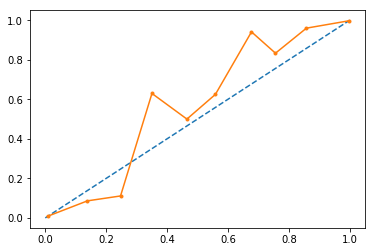

In [165]:
probs = calibrated.predict_proba(x_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

# Recursive Feature Elimination

In [180]:
from sklearn.feature_selection import RFE
rfe = RFE(rfc,52)
abc = rfe.fit(x_train,y_train)

In [181]:
abc.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True, False, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [169]:
x_rfe = rfe.fit_transform(x_train,y_train)

In [170]:
x_rfe.shape

(153559, 45)

In [253]:
preds = rfc.predict(x_test)

In [254]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
print(accuracy_score(y_test,preds))

[[11525    23]
 [   23    35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11548
           1       0.60      0.60      0.60        58

    accuracy                           1.00     11606
   macro avg       0.80      0.80      0.80     11606
weighted avg       1.00      1.00      1.00     11606

0.9960365328278477


# Loading and Predicting on the Test Data

In [255]:
fintest = pd.read_csv("test1.csv")

In [256]:
ohe1 = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
fintest_ohe = ohe1.fit_transform(fintest)
fintest_ohe.head()

,source_Y,source_X,source_Z,financial_institution_Browning-Hart,financial_institution_OTHER,"financial_institution_Miller, Mcclure and Allen","financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Thornton-Davis,"financial_institution_Swanson, Newton and Miller","financial_institution_Cole, Brooks and Vincent",...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [257]:
predictions = rfc.predict(fintest_ohe)

In [258]:
predictions.sum()

142

In [259]:
output = pd.DataFrame(data = {"loan_id":fintest_ohe["loan_id"],"m13":predictions})

In [260]:
output.to_csv('predictions.csv',index=False)

In [28]:
df = pd.read_csv("predictions.csv")

In [29]:
df.shape

(35866, 2)

In [43]:
df1 = pd.read_csv("sample_submission.csv")

In [44]:
df1.shape

(49739, 2)

In [45]:
df1.head()

,loan_id,m13
0,196706376986,0
1,786051527565,0
2,100072474882,0
3,328189712657,0
4,577598812667,0


In [46]:
df.head()

,loan_id,m13
0,196706376986,0
1,786051527565,0
2,100072474882,0
3,328189712657,0
4,577598812667,1


In [47]:
fintest.shape

(49739, 28)